In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression#Importamos la regresión logística de sklearn
from sklearn.model_selection import train_test_split#Importamos la fn train desde sklearn.model_selection. Básicamente dividios el conj de datos q tenemos en un subconjuto en:entrnamiento y prueba más abajo lo veremos mejor

In [2]:
#Importación del arch .csv
df = pd.read_csv('datos_seguro.csv')
df

,edad,compra
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


Allá ↑ en la columna compra... 0=no compró-1=compró

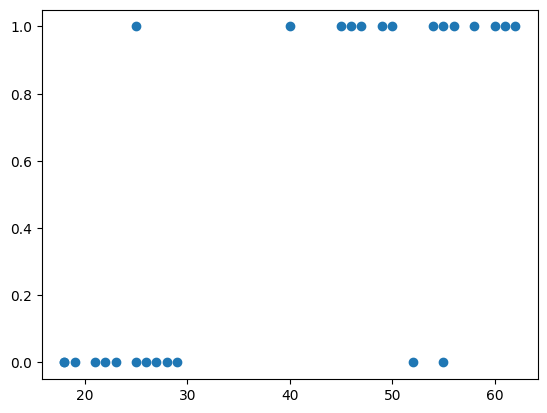

In [3]:
plt.scatter(df['edad'],df['compra']);

En el gráf podemos ver q los menores de 40 casi nunca comprar el seguro, en cambio los mayores a 40 la mmayoría sí lo hace. Aun así vamos a aplicar el algoritmo de regresión lineal para poder ser más precisos

Vamos a seperar la toda la info q tenemos para un conj de datos de entrenamiento y uno de prueba

Vamos a meter todos los registros del df en alguna de estas variables(no se van a repetir en un mismo grupo y son datos originales), lo haremos con la fn train_test_split 

In [4]:
#Siempre tiene q estar en ese orden las variables.... 1ero las X y dps las y
X_entrena,X_prueba,y_entrena,y_prueba = train_test_split(df[['edad']],df['compra'],train_size = 0.9)#Le pasamos la X 1ero por eso es bidimen [[]] y dps la y, con el size le estamos diciendo q meta el 90% de los datos a X_entrena-y_entrena y el 10 a X_prueba-y_prueba

NameError: name 'train_test_split' is not defined

Hicimos esto para entrenar al modelo y dps hacerle las pruebas, explicacion simple de las 4 var:
X_entrena:
Función: Contiene el 90% de las características (ejemplo: "edad") usadas para entrenar el modelo.
Uso: Se usa para que el modelo aprenda a partir de estos datos.

y_entrena:
Función: Contiene el 90% de los valores reales de la variable objetivo (ejemplo: "compra") que corresponden a X_entrena.
Uso: Se usa junto con X_entrena para que el modelo conozca las respuestas correctas durante el entrenamiento.

X_prueba:
Función: Contiene el 10% de las características reservadas para evaluar el modelo.
Uso: Se usa para generar predicciones una vez que el modelo está entrenado y así medir su desempeño.

y_prueba:
Función: Contiene el 10% de los valores reales de la variable objetivo que corresponden a X_prueba.
Uso: No se usa para generar predicciones, sino para comparar con las predicciones realizadas a partir de X_prueba y evaluar la precisión del modelo.

In [15]:
#Datos q sí entran al entrenamiento
X_entrena

,edad
3,52
0,22
7,60
25,54
21,26
12,27
2,47
6,55
1,25
16,25


In [36]:
#Estos datos no entran en el entrenamiento, quedan aislados
y_prueba

14    1
26    0
8     1
Name: compra, dtype: int64

In [17]:
#Guardaos el logis.... en una variable
modelo = LogisticRegression()

In [ ]:
Entrenamos a x e y entrena

In [18]:
modelo.fit(X_entrena,y_entrena)#Entrenamos al modelo con estos conjuntos con el algorito q ya la dimos.... la regresión logística

LogisticRegression()

In [ ]:
Calc el score de nuestro modelo entrenado

In [19]:
modelo.score(X_entrena,y_entrena)#Evaluamos el desempeño los modelos de nuestro logistic regression

0.875

↑87.5% el desempeño de lo q entrenamos

In [ ]:
Creamos un df para pasarselo a nuestros modelo y haga la prediccion

In [21]:
datos_nuevos = pd.DataFrame({'edad':[25,35,45,55]})
datos_nuevos

,edad
0,25
1,35
2,45
3,55


In [ ]:
Vemos las probabilidades de q tienen las edades de nuestro clientes con la fn predict_proba()

In [37]:
probabilidades = modelo.predict_proba(datos_nuevos)#Le pasamos como argumento la variables el df q creamos arriba para las predicciones
probabilidades

array([[0.85707044, 0.14292956],
       [0.62921388, 0.37078612],
       [0.3244323 , 0.6755677 ],
       [0.11964473, 0.88035527]])

Tomamos solo las probabilidades y lo guardamos en prob_comppra

In [59]:
prob_comppra = probabilidades[:,1]#estamos extrayendo la segunda columna de la matriz de probabilidades que devuelve predict_proba, que contiene las probabilidades de que cada muestra pertenezca a la clase 1.
prob_comppra

array([0.37078612, 0.6755677 , 0.88035527])

Gráficamos el gráf anterior y un nuevo gráf con los datos q creamos nosotros

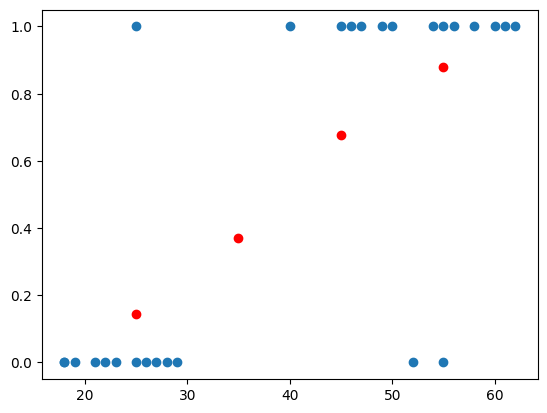

In [28]:
plt.scatter(df['edad'],df['compra']);
plt.scatter(datos_nuevos['edad'],prob_comppra,color='red')#Gráficamos diferenciando los colores, en este caso rojo le ponemos

In [ ]:
Probamos ahora con los datos de X_prueba q habiamos aislado

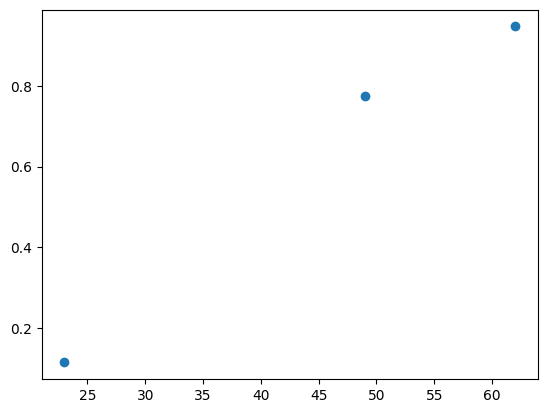

In [33]:
probabilidades = modelo.predict_proba(X_prueba)#Le pasamos como argumento la variables el df q creamos arriba para las predicciones

prob = probabilidades[:,1]
plt.scatter(X_prueba,prob)